In [30]:
import shap
import joblib
import pandas as pd

model = joblib.load(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\backend\resources\model_LGB.joblib")
client_id = 100001

data_test = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_test_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")

data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")



Trying to unpickle estimator LabelEncoder from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


[2.9474512818708796, -2.9474512818708796]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [68]:
client_df = data_test[data_test.index == client_id]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(client_df)
expected_values = explainer.expected_value

print(expected_values)

[2.9474512818708796, -2.9474512818708796]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [32]:
shap_values

[array([[-1.46711596e-01, -5.07538082e-03, -6.25014641e-04,
         -2.97151643e-04,  7.63564190e-03, -2.58244999e-02,
          4.97789705e-02, -8.18665965e-02, -2.71566152e-02,
          1.55535622e-02, -4.73394589e-03,  3.08614403e-03,
         -2.42486219e-02, -8.28803212e-02,  0.00000000e+00,
          0.00000000e+00,  1.21067635e-02,  0.00000000e+00,
         -6.21189750e-03, -4.43217734e-04,  6.22545941e-05,
          1.51985539e-03, -5.10667947e-04,  3.97815925e-02,
          0.00000000e+00,  0.00000000e+00, -2.64625988e-05,
          7.94539378e-03, -4.12883354e-06,  4.30475640e-04,
          4.42408776e-01,  8.24262692e-01, -7.28413596e-01,
          1.11258131e-03, -1.59359435e-03, -2.07929770e-03,
         -2.47856076e-04, -6.10452862e-05,  2.27812586e-03,
          1.66048960e-03, -4.32009025e-03,  1.20385287e-04,
          7.91635436e-04,  4.93617557e-04, -8.27624951e-04,
          3.52285399e-06,  6.73608249e-04,  3.40589247e-03,
          2.30458128e-03, -1.28126765e-0

In [2]:
from json import JSONEncoder
import numpy
import json


class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [34]:
numpyData = {"array": shap_values}
encodedNumpyData = json.dumps(numpyData, cls=NumpyArrayEncoder)  # use dump() to write array into file
# return encodedNumpyData

response = {"expected_value": expected_values,
            "shap_values": encodedNumpyData}

In [35]:
# Deserialization
print("Decode JSON serialized NumPy array")
decodedArrays = json.loads(encodedNumpyData)

finalNumpyArray = numpy.asarray(decodedArrays["array"])
print("NumPy Array")
print(finalNumpyArray)

Decode JSON serialized NumPy array
NumPy Array
[[[-1.46711596e-01 -5.07538082e-03 -6.25014641e-04 ...  0.00000000e+00
   -5.93327774e-04 -1.31925901e-04]]

 [[ 1.46711596e-01  5.07538082e-03  6.25014641e-04 ...  0.00000000e+00
    5.93327774e-04  1.31925901e-04]]]


In [36]:
response

{'expected_value': [2.9474512818708796, -2.9474512818708796],
 'shap_values': '{"array": [[[-0.14671159560955704, -0.005075380821287493, -0.0006250146411445615, -0.00029715164338830287, 0.007635641900824451, -0.025824499946720172, 0.04977897047071447, -0.08186659654213997, -0.02715661517835538, 0.0155535622338104, -0.004733945891489838, 0.0030861440291109748, -0.024248621905208666, -0.08288032116177425, 0.0, 0.0, 0.012106763481381662, 0.0, -0.006211897504386859, -0.00044321773403714924, 6.225459414668105e-05, 0.0015198553853375746, -0.0005106679471363852, 0.039781592462061664, 0.0, 0.0, -2.6462598792030274e-05, 0.007945393782069475, -4.12883354059065e-06, 0.00043047564029491815, 0.44240877571287046, 0.8242626920337555, -0.7284135960836721, 0.0011125813146732773, -0.0015935943525166873, -0.0020792976990557208, -0.0002478560760619735, -6.104528624217426e-05, 0.0022781258633932243, 0.001660489596464672, -0.0043200902521955105, 0.00012038528742066693, 0.0007916354356187861, 0.0004936175571

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import joblib

In [7]:
prediction = 0

In [10]:
columns = client_df.columns

In [57]:
finalNumpyArray.shape

(2, 1, 777)

In [41]:
shap_values[0]

array([[-1.46711596e-01, -5.07538082e-03, -6.25014641e-04,
        -2.97151643e-04,  7.63564190e-03, -2.58244999e-02,
         4.97789705e-02, -8.18665965e-02, -2.71566152e-02,
         1.55535622e-02, -4.73394589e-03,  3.08614403e-03,
        -2.42486219e-02, -8.28803212e-02,  0.00000000e+00,
         0.00000000e+00,  1.21067635e-02,  0.00000000e+00,
        -6.21189750e-03, -4.43217734e-04,  6.22545941e-05,
         1.51985539e-03, -5.10667947e-04,  3.97815925e-02,
         0.00000000e+00,  0.00000000e+00, -2.64625988e-05,
         7.94539378e-03, -4.12883354e-06,  4.30475640e-04,
         4.42408776e-01,  8.24262692e-01, -7.28413596e-01,
         1.11258131e-03, -1.59359435e-03, -2.07929770e-03,
        -2.47856076e-04, -6.10452862e-05,  2.27812586e-03,
         1.66048960e-03, -4.32009025e-03,  1.20385287e-04,
         7.91635436e-04,  4.93617557e-04, -8.27624951e-04,
         3.52285399e-06,  6.73608249e-04,  3.40589247e-03,
         2.30458128e-03, -1.28126765e-03, -3.66622378e-0

In [49]:
len(shap_values[1])

1

In [52]:
l = list(finalNumpyArray)

In [56]:
len(l[1].shape)

2

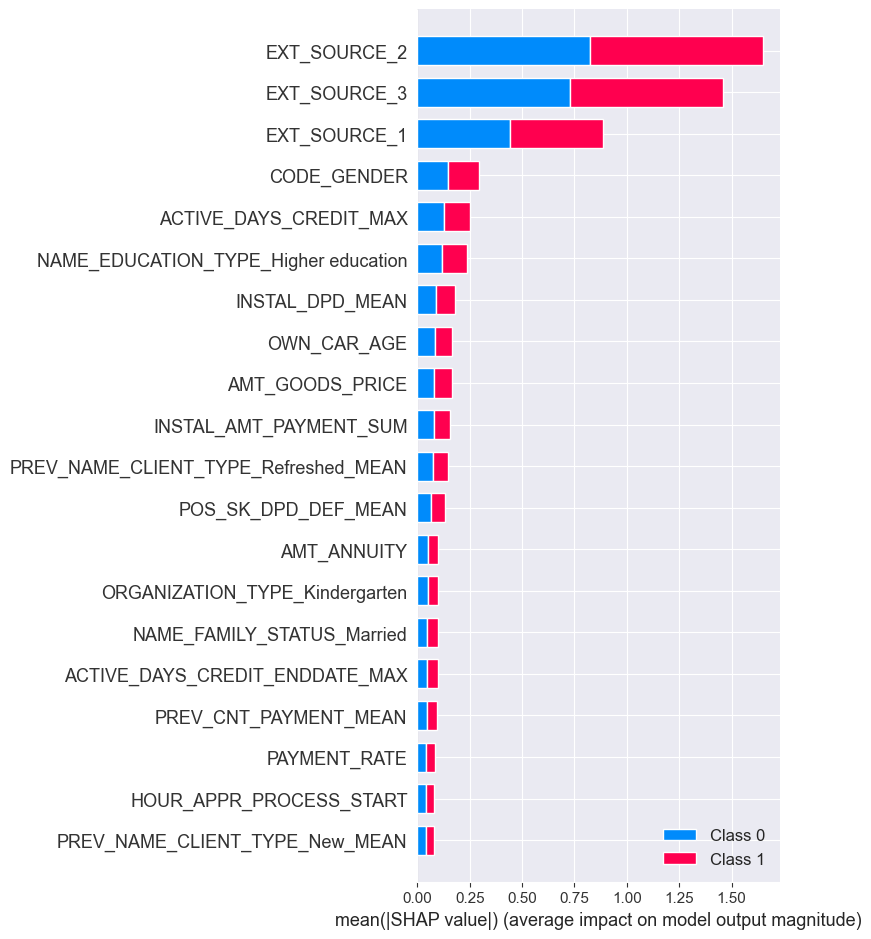

In [58]:

fig = shap.summary_plot(l, features=client_df, feature_names=client_df.columns)

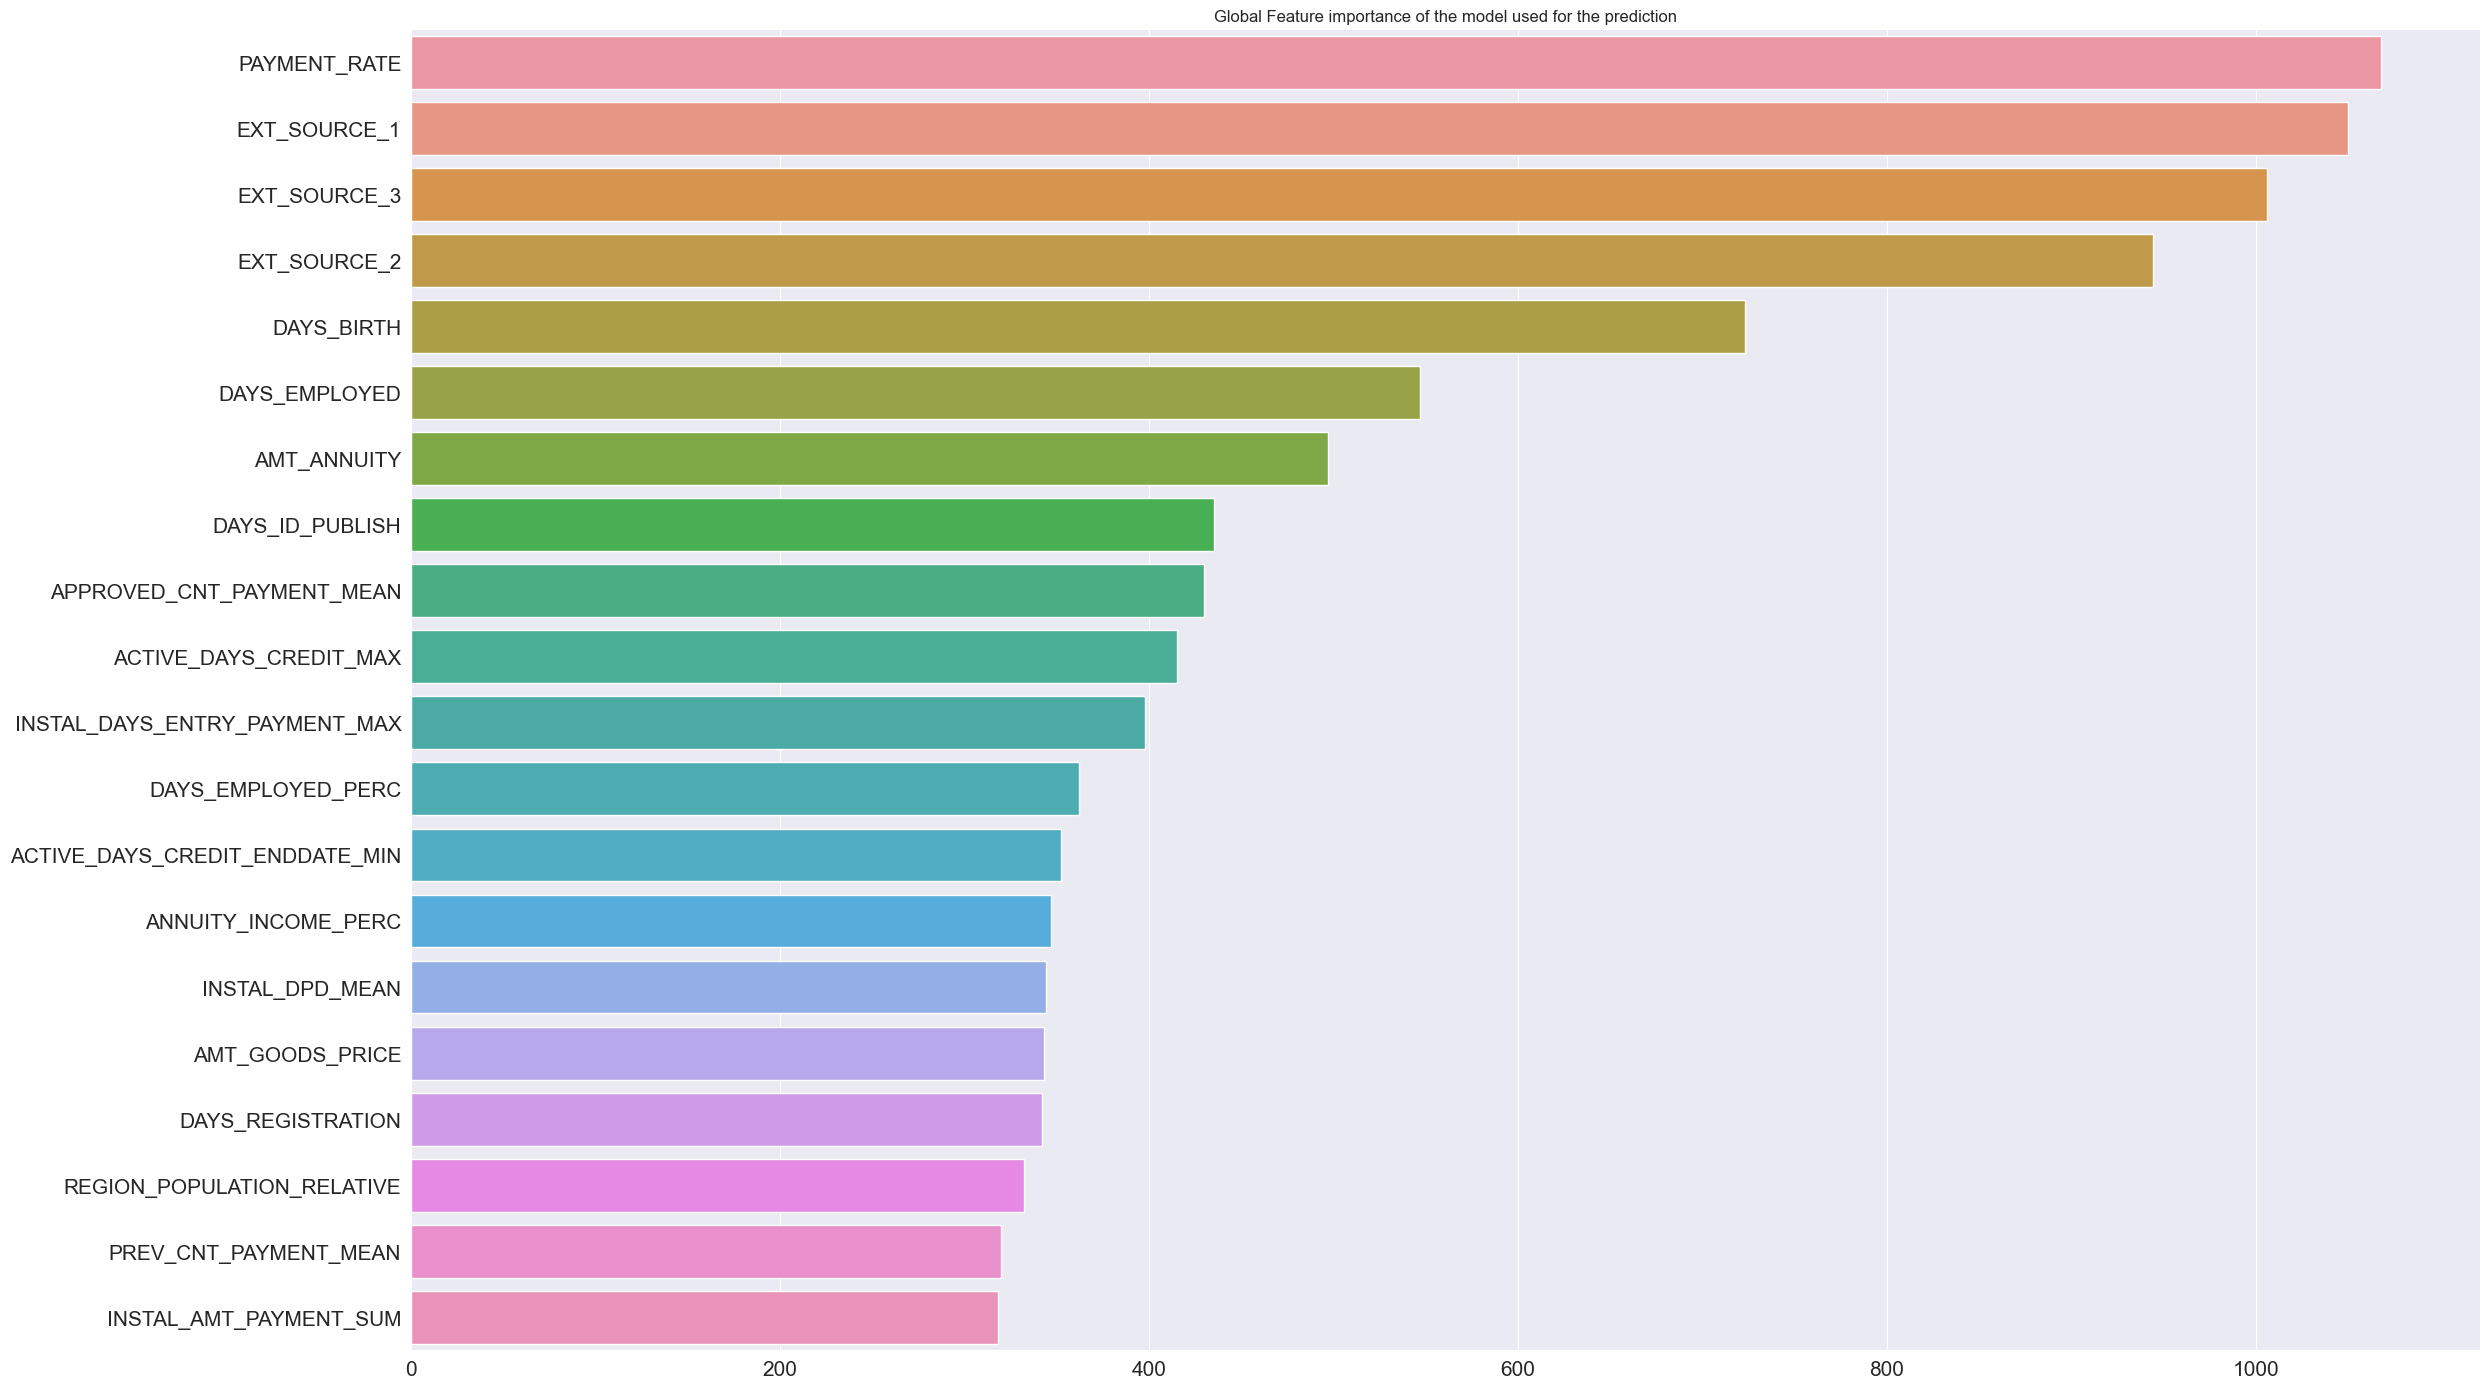

In [12]:
    # create dict {columns_name:model_feature_importance}
max_features_to_display = 20

dict_f_i = dict(zip(columns.tolist(), model.feature_importances_.tolist()))
# sorted by feature_importance
dict_f_i = {k: v for k, v in sorted(dict_f_i.items(), key=lambda item: item[1], reverse=True)}
# return barplot
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize=(25, 14))
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)
fig = sns.barplot(x=list(dict_f_i.values())[:max_features_to_display],
                  y=list(dict_f_i.keys())[:max_features_to_display])
fig.set(title="Global Feature importance of the model used for the prediction")

plt.show()

In [13]:
dict_f_i

{'PAYMENT_RATE': 1068,
 'EXT_SOURCE_1': 1050,
 'EXT_SOURCE_3': 1006,
 'EXT_SOURCE_2': 944,
 'DAYS_BIRTH': 723,
 'DAYS_EMPLOYED': 547,
 'AMT_ANNUITY': 497,
 'DAYS_ID_PUBLISH': 435,
 'APPROVED_CNT_PAYMENT_MEAN': 430,
 'ACTIVE_DAYS_CREDIT_MAX': 415,
 'INSTAL_DAYS_ENTRY_PAYMENT_MAX': 398,
 'DAYS_EMPLOYED_PERC': 362,
 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN': 352,
 'ANNUITY_INCOME_PERC': 347,
 'INSTAL_DPD_MEAN': 344,
 'AMT_GOODS_PRICE': 343,
 'DAYS_REGISTRATION': 342,
 'REGION_POPULATION_RELATIVE': 332,
 'PREV_CNT_PAYMENT_MEAN': 320,
 'INSTAL_AMT_PAYMENT_SUM': 318,
 'AMT_CREDIT': 316,
 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN': 306,
 'INSTAL_DBD_SUM': 306,
 'APPROVED_DAYS_DECISION_MAX': 290,
 'INSTAL_AMT_PAYMENT_MIN': 286,
 'DAYS_LAST_PHONE_CHANGE': 282,
 'CLOSED_DAYS_CREDIT_MAX': 276,
 'BURO_DAYS_CREDIT_MAX': 264,
 'OWN_CAR_AGE': 262,
 'CLOSED_DAYS_CREDIT_VAR': 262,
 'INSTAL_DBD_MAX': 260,
 'ACTIVE_AMT_CREDIT_SUM_SUM': 257,
 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN': 256,
 'POS_MONTHS_BALANCE_SIZE': 255,
 'INCOME

In [14]:
list_features = list(dict_f_i.keys())[:10]


In [15]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX']

In [16]:
title = "This graph allows you to visualize the distribution of the selected features, separated in relation to credit accepted or refused and compared with the customer's data. \n The average is the black line while the customer data in red"


In [17]:
title

"This graph allows you to visualize the distribution of the selected features, separated in relation to credit accepted or refused and compared with the customer's data. \n The average is the black line while the customer data in red"

In [18]:
mapping_x_ticks = {
    '1': 'Default Client',
    '0': 'Not Default Client'
}


def create_box_plot(data, feature:str, feature_value:float):
    fig, ax = plt.subplots(figsize=(12, 9))
    # create boxplot
    sns.boxplot(data=data[~data.TARGET.isna()],
                y=feature,
                x='TARGET',
                orient="v",
                showfliers = False,
                palette=["#4286DE", "#EA365B"])
    # add client treshshold
    ax.axhline(feature_value,
               color='r',
               label='Client value')
    # add label and legend
    ax.legend()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [mapping_x_ticks[i] for i in labels]
    ax.set_xticklabels(labels)
    ax.set_title(f'{feature}')
    ax.title.set_size(20)

    plt.show()

In [19]:
data_train.shape

(307507, 778)

In [20]:
data = data_train[~data_train.TARGET.isna()]
data.shape

(307507, 778)

In [21]:
feature = "PAYMENT_RATE"

In [22]:
data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR", usecols=[feature, "SK_ID_CURR"])

In [23]:
data_train

,PAYMENT_RATE
SK_ID_CURR,
100002,0.060749
100003,0.027598
100004,0.050000
100006,0.094941
100007,0.042623
...,...
456251,0.108198
456252,0.044524
456253,0.044239


In [24]:
feature_value = client_df[feature].values[0]
feature_value

0.0361471518987341

In [25]:
fig, ax = plt.subplots(figsize=(12, 9))
# create boxplot
sns.boxplot(data=data_train,
            y=feature,
            x='TARGET',
            orient="v",
            showfliers=False,
            palette=["#4286DE", "#EA365B"])
# add client treshshold
ax.axhline(feature_value,
           color='r',
           label='Client value')
# add label and legend
ax.legend()
labels = [item.get_text() for item in ax.get_xticklabels()]
print(labels)
labels = [mapping_x_ticks[i] for i in labels]
print(labels)
ax.set_xticklabels(labels)
ax.set_title(f'{feature}')
ax.title.set_size(20)

plt.show()

ValueError: Could not interpret input 'TARGET'

In [ ]:

def boxplot_all_clients_compared_to_client_feature_value(data_all_clients, feature, client_df):
    """
    Positions the client
    """
    mapping_x_ticks = {
        '1': 'Default Client',
        '0': 'Non Default Client'
    }
    feature_value = client_df[feature].values[0]  # we get the value for the client's feature

    fig, ax = plt.subplots(figsize=(12, 9))
    # create boxplot
    sns.boxplot(data=data_all_clients,
                y=feature,
                x='TARGET',
                orient="v",
                showfliers=False,
                palette=["#4286DE", "#EA365B"])
    # add client threshold
    ax.axhline(feature_value,
               color='r',
               label='Client value')
    # add label and legend
    ax.legend()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    print(labels)
    labels = [mapping_x_ticks[i] for i in labels]
    print(labels)
    ax.set_xticklabels(labels)
    ax.set_title(f'{feature}')
    ax.title.set_size(20)

    # to see the plot in notebook :
    # plt.show()

In [ ]:
list_features


In [ ]:
DATA_ALL_CLIENTS_PATH = r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz"

In [ ]:

def display_boxplot(df, width=8, height=6):
    """
    :return:
    """
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    n = len(numeric_columns)

    fig = plt.figure(figsize=(width, height))
    for i, variable in enumerate(df[numeric_columns].columns.tolist()):
        position = int('1{}{}'.format(n, i + 1))
        ax = fig.add_subplot(position)

        bp = sns.boxplot(data=df[variable], ax=ax)  # showfliers=False
        bp.set_title(variable)

    plt.tight_layout()
    plt.show()


In [ ]:
print("__Reading database of all clients for the list of features : ", list_features)


In [ ]:
list_features


In [ ]:
list_features

In [ ]:
columns_list = list_features.copy()
columns_list.extend(["SK_ID_CURR", "TARGET"])

In [ ]:
columns_list


In [ ]:
data_all_clients = pd.read_csv(DATA_ALL_CLIENTS_PATH, encoding="utf-8", index_col="SK_ID_CURR",
                               usecols=columns_list)

In [ ]:
data_all_clients.shape

In [ ]:
data_all_clients.head()

In [ ]:
df = data_all_clients.copy()

In [ ]:
df

In [ ]:
list_features = list_features[:6]

In [ ]:
list_features

In [ ]:
df["PAYMENT_RATE"]

In [ ]:
columns_list

In [ ]:
list_features

In [ ]:
df

In [ ]:

n = len(list_features)

fig = plt.figure(figsize=(20, 15))
for i, variable in enumerate(list_features):
    position = int('1{}{}'.format(n, i + 1))
    ax = fig.add_subplot(position)

    bp = sns.boxplot(data=df[variable].values, ax=ax)  # showfliers=False
    bp.set_title(variable)

plt.tight_layout()
plt.show()

In [ ]:
df["PAYMENT_RATE"].values

In [ ]:
def global_shap_barplot():
    shap_values = ""
    # Plot summary_plot as barplot:
    shap.summary_plot(shap_values, X_importance, plot_type='bar')

In [ ]:
    # Positioning of the client with comparison to other clients (choice of feature)
"---------------------------"
st.header(
    'Positioning of the client with comparison to other clients (choice of feature)'
)
sorted_options = sorted(list(df_test_sample.columns))
selected_feature = st.selectbox(
    f'Choose a feature among {len(sorted_options)}',
    options=sorted_options,
    index=sorted_options.index('OCCUPATION_TYPE'))

# Basic dashboard
plot_selector(selected_feature, dashboard='Basic Dashboard')

# Advanced dashboard
if dashboard_choice == 'Advanced Dashboard' and selected_feature in list_quantitative_features:
    plot_selector(selected_feature)

In [ ]:

# Positioning of the client with comparison to other clients (choice of two features)
"---------------------------"
st.header(
    'Positioning of the client with comparison to other clients (choice of two features)'
)
left_column, right_column = st.columns(2)
with left_column:
    selected_feature1 = st.selectbox(
        'Choose feature 1',
        options=list_quantitative_features,
        index=list_quantitative_features.index('EXT_SOURCE_1'))
with right_column:
    selected_feature2 = st.selectbox(
        'Choose feature 2',
        options=list_quantitative_features,
        index=list_quantitative_features.index('EXT_SOURCE_2'))
contourplot(selected_feature1, selected_feature2)

In [60]:
def shap_summary_plot(shap_values, client_df):
    plt.rcParams['figure.autolayout'] = True
    print("here")
    fig = shap.summary_plot(shap_values, features=client_df, feature_names=client_df.columns)
    fig.suptitle(
        "Shows the average impact of the features on the model output",
        y=0.92, size=20)
    # to see the plot in notebook :
    # plt.show()
    # to see the plot in streamlit dashboard
    plt.show()
    print("end")

In [73]:
fig = shap.force_plot(np.around(expected_values[prediction], decimals=2),
                       np.around(shap_values[prediction], decimals=2),
                       np.around(client_df, decimals=2))
fig

here


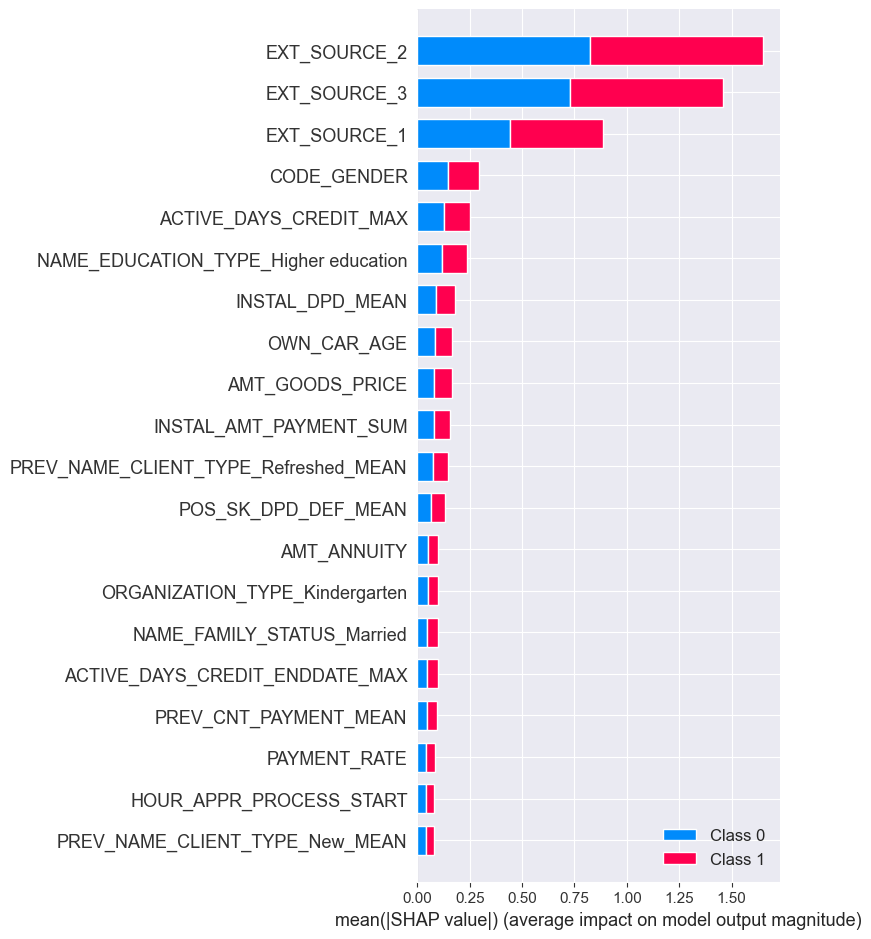

AttributeError: 'NoneType' object has no attribute 'suptitle'

In [61]:
shap_summary_plot(l, client_df)

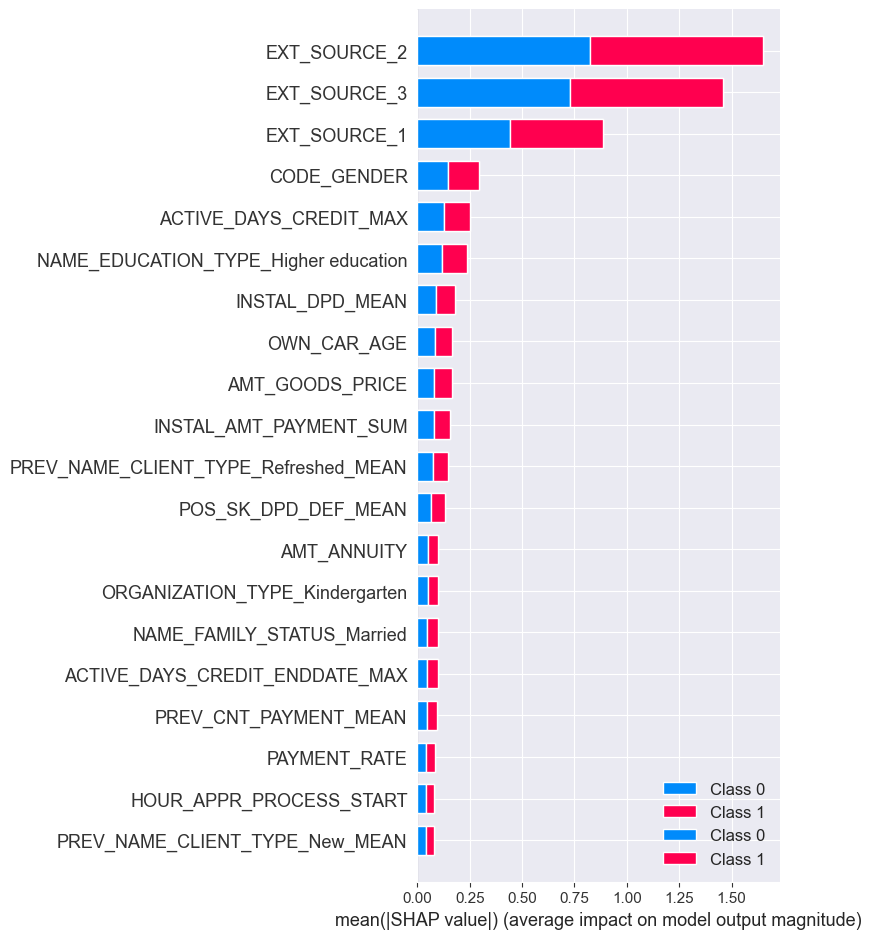

None

In [67]:
fig = shap.summary_plot(shap_values, features=client_df, feature_names=client_df.columns, show=False)
display(fig)